In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("C:/Users/VIGNEESH GPL/BigData/data2/encoded_dataset.csv")

# Want to predict new target variable
X = df.drop(['finalgrade'], axis=1)
y = df['finalgrade']

In [64]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Decision Tree Model
dt = DecisionTreeClassifier(max_depth=14, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Model Accuracy and Classification Report
acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc:.3f}\n")

print("Classification Report:\n",
      classification_report(y_test, y_pred_dt,
                            target_names=['Fail', 'Average', 'Good', 'Excellent']))

# Low (2–5)
# Medium (8–14)
# High (15–20)

# Macro Avg = Average of all classes equally — treats Fail, Average, Good, and Excellent as equally important.
# Weighted Avg = Takes into account how many samples each class has — bigger classes influence the score more.

Decision Tree Accuracy: 0.744

Classification Report:
               precision    recall  f1-score   support

        Fail       0.72      0.78      0.75       644
     Average       0.79      0.68      0.73       556
        Good       0.73      0.79      0.76       603
   Excellent       0.75      0.71      0.73       555

    accuracy                           0.74      2358
   macro avg       0.75      0.74      0.74      2358
weighted avg       0.75      0.74      0.74      2358



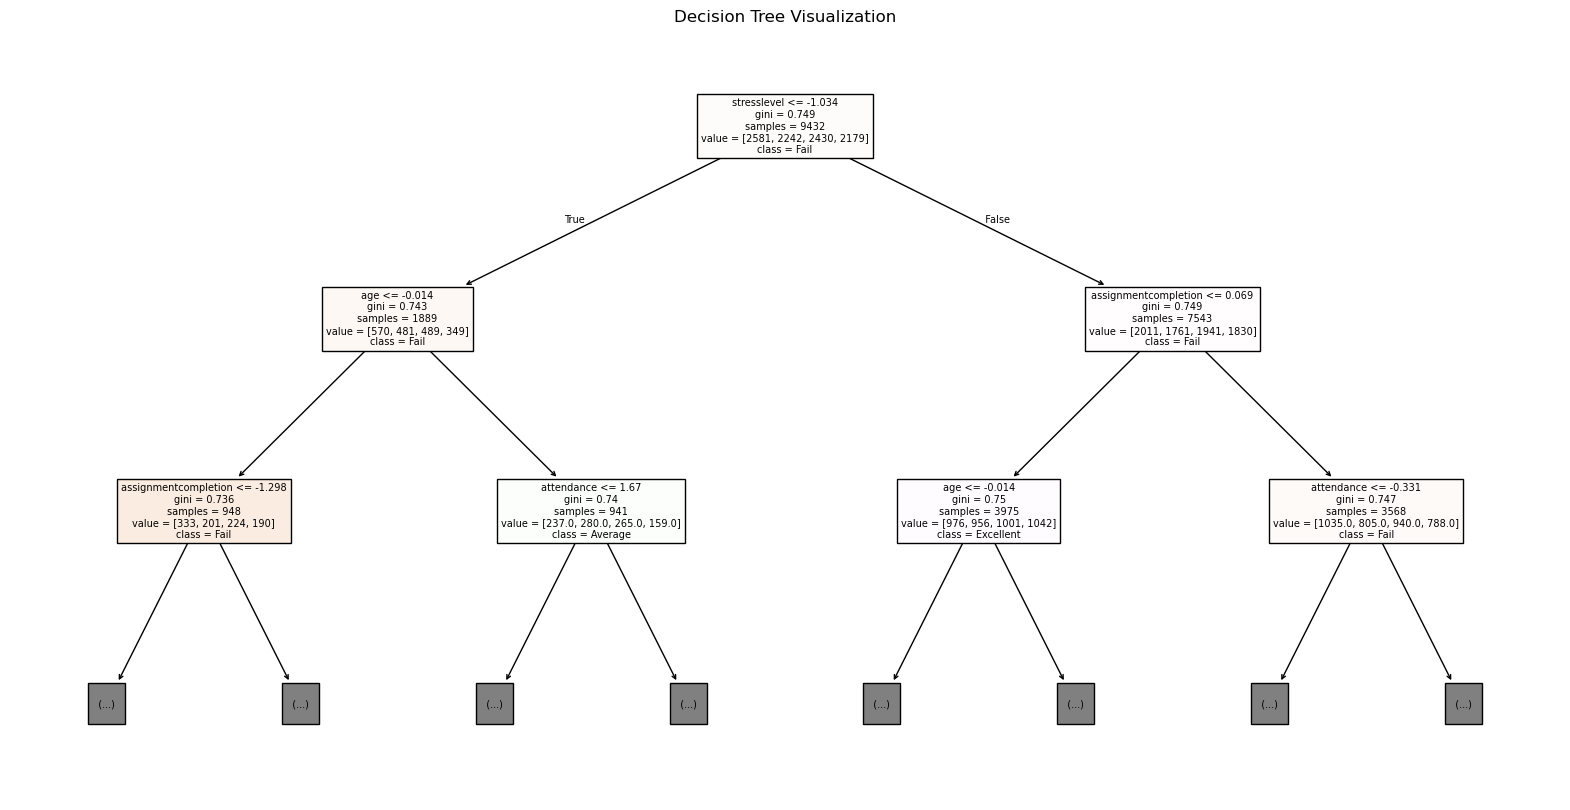

In [65]:
# Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt,
          filled=True,
          feature_names=X.columns,
          class_names=['Fail', 'Average', 'Good', 'Excellent'],
          max_depth=2)
plt.title("Decision Tree Visualization")
plt.show()

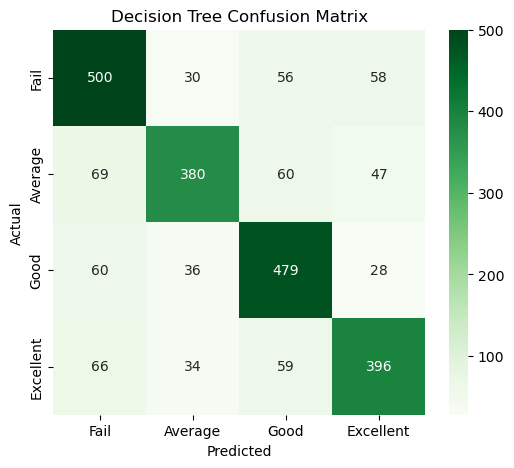

In [35]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,5))
sns.heatmap(cm,
            annot=True,
            fmt= 'd',
            cmap='Greens',
            xticklabels=['Fail', 'Average', 'Good', 'Excellent'],
            yticklabels=['Fail', 'Average', 'Good', 'Excellent'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

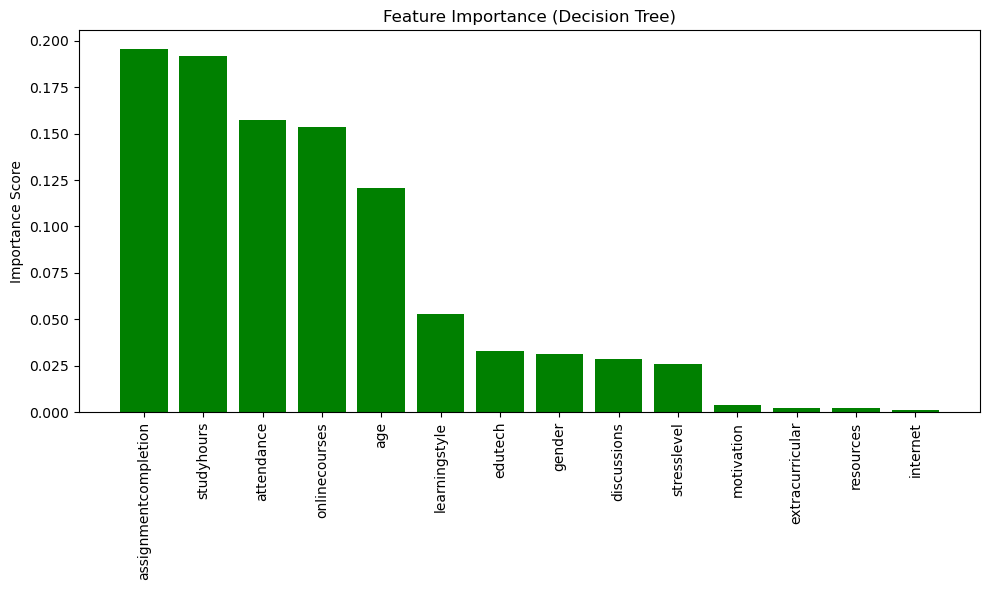

In [36]:
# Feature Importance
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], color='green')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance (Decision Tree)')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [43]:
# Train XGBoost model
xgb = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n",
      classification_report(y_test, y_pred_dt,
                            target_names=['Fail', 'Average', 'Good', 'Excellent']))

XGBoost Accuracy: 0.8558100084817643
Classification Report:
               precision    recall  f1-score   support

        Fail       0.72      0.78      0.75       644
     Average       0.79      0.68      0.73       556
        Good       0.73      0.79      0.76       603
   Excellent       0.75      0.71      0.73       555

    accuracy                           0.74      2358
   macro avg       0.75      0.74      0.74      2358
weighted avg       0.75      0.74      0.74      2358



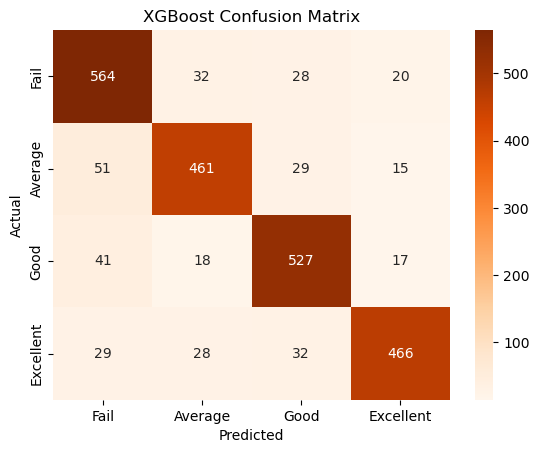

In [44]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Oranges',
            xticklabels=['Fail', 'Average', 'Good', 'Excellent'],
            yticklabels=['Fail', 'Average', 'Good', 'Excellent'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

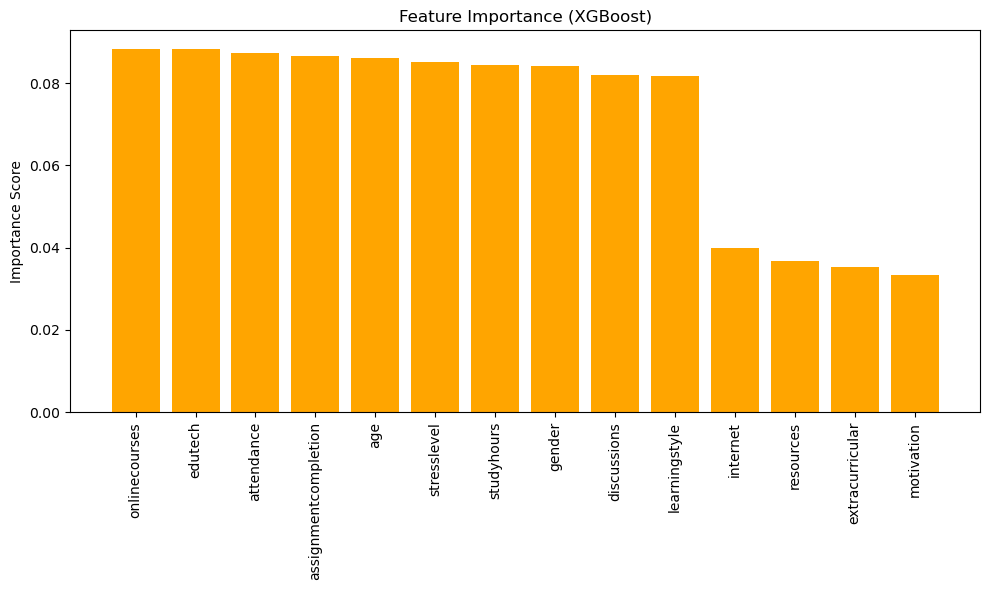

In [45]:
# Feature Importance
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], color='orange')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title('Feature Importance (XGBoost)')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

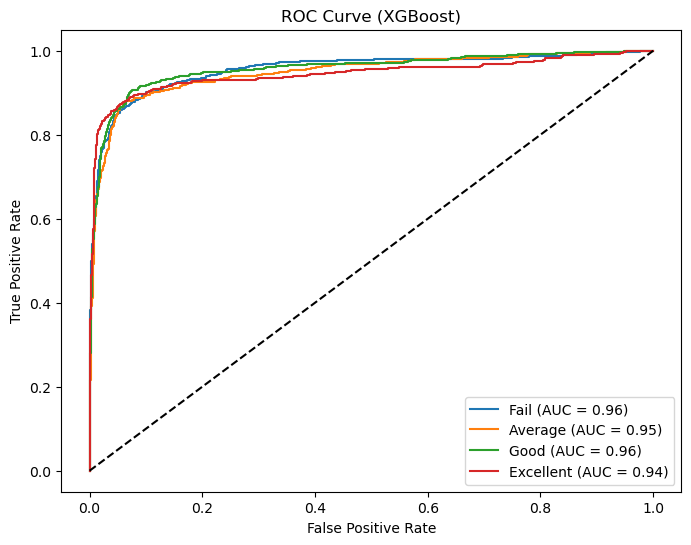

In [62]:
# ROC (Receiver Operating Characteristic) Curve
y_test_bin = label_binarize(y_test, classes=[0,1,2,3])
y_pred_prob = xgb.predict_proba(X_test)

plt.figure(figsize=(8,6))
for i, label in enumerate(['Fail', 'Average', 'Good', 'Excellent']):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (XGBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()